In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
rcParams['figure.figsize'] = (12,8)
rcParams['font.size'] = 18
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 8
pynbody.config['number_of_threads'] = 32

In [3]:
pynbody.openmp.get_cpus()

16

In [4]:
import matplotlib.pyplot as plt 

In [16]:
s = pynbody.load('./output_00017')
s['pos']
s['pos'] -= 0.5
s.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Done
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 17
INFO:pynbody.snapshot.ramses:Loading data from CPU 33
INFO:pynbody.snapshot.ramses:Loading data from CPU 49
INFO:pynbody.snapshot.ramses:Loading data from CPU 65
INFO:pynbody.snapshot.ramses:Loading data from CPU 81
INFO:pynbody.snapshot.ramses:Loading data from CPU 97
INFO:pynbody.snapshot.ramses:Loading data from CPU 113
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 18
INFO:pynbody.snapshot.ramses:Loading data from CPU 34
INFO:pynbody.snapshot.ramses:Loading data from CPU 50
INFO:pynbody.snapshot.ramses:Loading data from CPU 66
INFO:pynbody.snapshot.ramses:Loading data from CPU 82
INFO:pynbody.snapshot.ramses:Loading data from CPU 98
INFO:pynbody.snapshot.ramses

In [17]:
z = 1/s.properties['a']-1
print "Redshift =",z
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print boxsizestring
print s.properties['a']

Redshift = 18.1312146943
220.46 kpc
0.0522705962994


In [19]:
s.g['metal'][s.g['metal']<1e-7] = 0.0
s.g['pzf'][s.g['pzf']<1e-7] = 0.0
s.g['pgf'][s.g['pgf']>(1.0-1e-7)] = 1.0
linex=(1e-7,1)

In [20]:
s.g['metal'][s.g['metal']>1e-7]

SimArray([  7.77929575e-07,   2.07718391e-06,   5.11621820e-05, ...,
         2.21505540e-07,   7.49080155e-05,   6.49409357e-05])

In [21]:
s.s

<SimSnap "./output_00017::star" len=159>

In [22]:
liney=(1e-7*12.45144,12.45144) # Y coords of line with slope 12.4514423189731

(1e-07, 1)

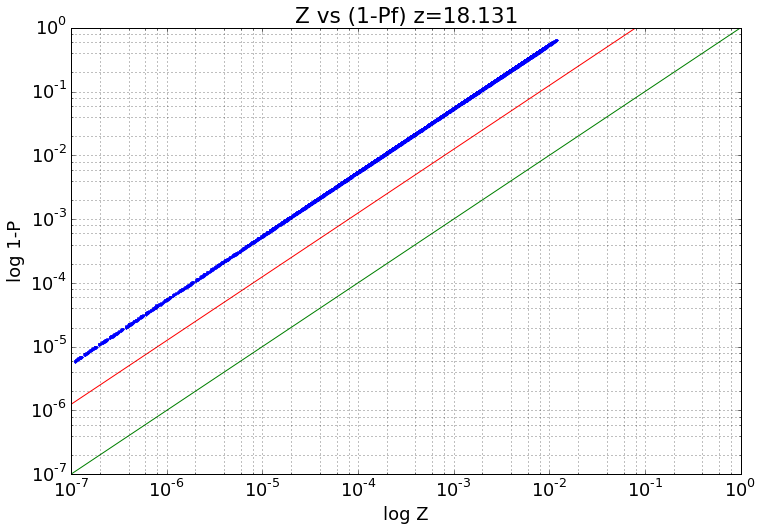

In [23]:
plt.loglog(s.g['metal'],1.0-s.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


SimArray([[  2.48606279e-27,   2.45723393e-27,   2.40557240e-27, ...,
          2.35063062e-27,   2.35038507e-27,   2.42838735e-27],
       [  2.47594992e-27,   2.45492743e-27,   2.41939884e-27, ...,
          2.34885203e-27,   2.35773653e-27,   2.41644446e-27],
       [  2.44633047e-27,   2.43208629e-27,   2.41638900e-27, ...,
          2.37606811e-27,   2.35025083e-27,   2.39272914e-27],
       ..., 
       [  2.42801237e-27,   2.38614554e-27,   2.32021094e-27, ...,
          2.43362819e-27,   2.42019637e-27,   2.43564233e-27],
       [  2.41582123e-27,   2.39185669e-27,   2.32593885e-27, ...,
          2.39947644e-27,   2.39377473e-27,   2.40765587e-27],
       [  2.44406268e-27,   2.41166045e-27,   2.36302591e-27, ...,
          2.38303208e-27,   2.38051952e-27,   2.40285472e-27]], dtype=float32, 'g cm**-3')

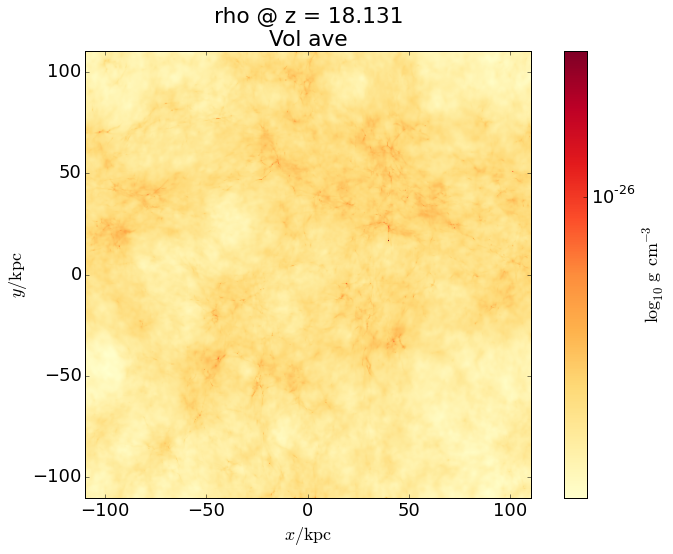

In [25]:
titleStr = "rho @ z = %.3lf" % z + "\nVol ave "
sph.image(s.g,qty="rho",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              units="g cm^-3",approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

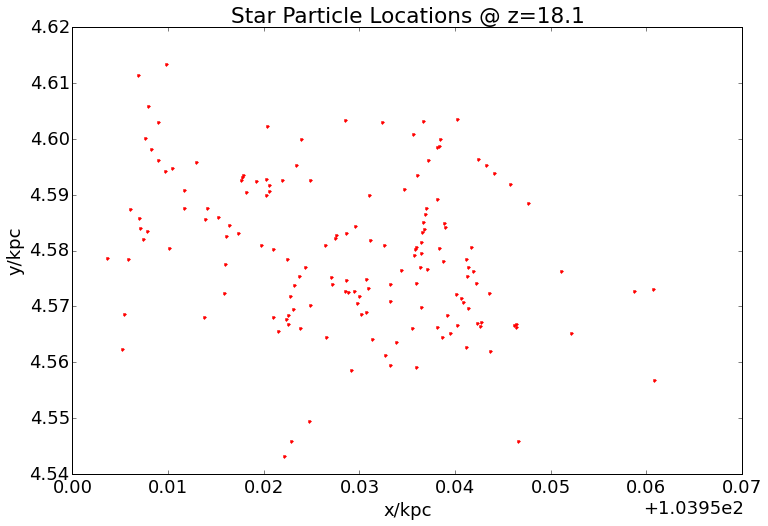

In [38]:
plt.plot(s.s['x'],s.s['y'],'r.')
plt.title("Star Particle Locations @ z=%.1f"%z)
axes().set_xlabel("x/kpc")
axes().set_ylabel("y/kpc")
#plt.ylim(4.5, 4.65)
#plt.xlim(103.94, 104)

In [40]:
s.derivable_keys()[1:5]

['mass', 'temp', 'r_mag', 'i_mag']

In [41]:
pynbody.analysis.ramses_util.get_tform(s);

Path to part2birth  /Users/earnric/bin/f90/part2birth
output to use output_00017


SimArray([ 0.2095996 ,  0.20861103,  0.20579471,  0.2011658 ,  0.20601267,
        0.21121548,  0.21124351,  0.2095996 ,  0.20709973,  0.20916083,
        0.20492869,  0.20924518,  0.20709973,  0.20183836,  0.20688299,
        0.20294992,  0.20796214,  0.20071557,  0.20709973,  0.20861103,
        0.20796214,  0.20427068,  0.20470998,  0.20228389,  0.2088269 ,
        0.20536344,  0.20666579,  0.20383014,  0.20405038,  0.20272851,
        0.20904316,  0.20071557,  0.20753055,  0.199581  ,  0.20978305,
        0.20688299,  0.20709973,  0.20753055,  0.20339059,  0.20916083,
        0.2025064 ,  0.20272851,  0.21026272,  0.20839525,  0.20470998,
        0.20161449,  0.2107217 ,  0.20796214,  0.20405038,  0.21111065,
        0.20557826,  0.20709973,  0.20360973,  0.20360973,  0.20339059,
        0.20904316,  0.20839525,  0.20470998,  0.20514733,  0.20206132,
        0.20138964,  0.20817914,  0.209642  ,  0.21067625,  0.20536344,
        0.20557826,  0.20360973,  0.20514733,  0.20449074,  0

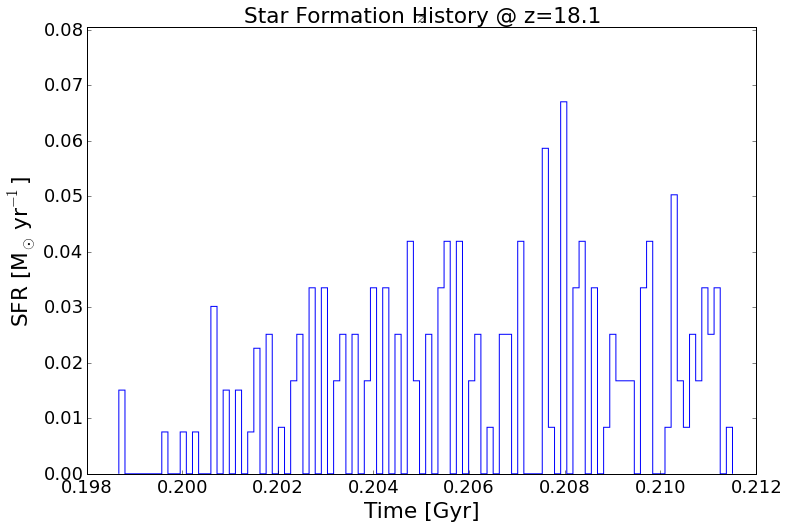

In [47]:
pynbody.plot.stars.sfh(s.s);
plt.title("Star Formation History @ z=%.1f"%z)

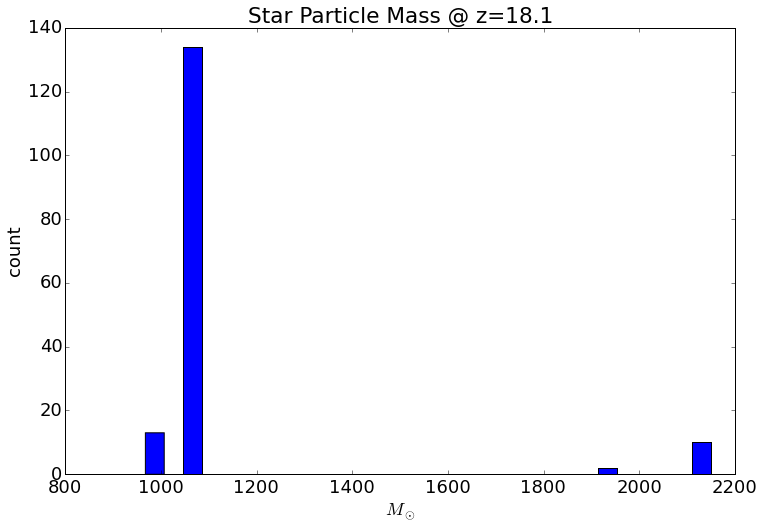

In [57]:
plt.hist(s.s['mass'],bins=30);
plt.title("Star Particle Mass @ z=%.1f"%z)
axes().set_xlabel("$M_{\odot}$")
axes().set_ylabel("count")

In [46]:
s.s['mass'],len(s.s)

(SimArray([ 1074.95016022,  1074.95016022,  1074.95016022,   967.4551442 ,
         1074.95016022,  1074.95016022,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  2149.90032045,
         1074.95016022,  1934.9102884 ,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  2149.90032045,
         1074.95016022,  1074.95016022,  1074.95016022,   967.4551442 ,
         2149.90032045,   967.4551442 ,  1074.95016022,  2149.90032045,
         1074.95016022,  2149.90032045,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  1074.95016022,
         1074.95016022,   967.4551442 ,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  1074.95016022,
         1074.95016022,  1074.95016022,  1074.95016022,  1074

In [8]:
s.derivable_keys()[1:5]

['mass', 'temp', 'r_mag', 'i_mag']

In [9]:
# Use the special utilities to get the time correct
pynbody.analysis.ramses_util.get_tform(s)

Path to part2birth  /Users/earnric/bin/f90/part2birth
output to use output_00013


SimArray([ 0.17558325,  0.18574317,  0.18574317,  0.17786153,  0.18462372,
        0.19409861,  0.18574317], 'Gyr')

In [11]:
len(s.s)

7

In [12]:
temp=s.g['pgf'][s.g['pgf']>1.0]-1.0

In [13]:
len(temp[temp>1e-7])

19011

In [14]:
temp[temp>1e-7]

SimArray([  2.03235671e-05,   2.03822426e-05,   3.33601135e-05, ...,
         8.29304847e-07,   9.70122563e-07,   8.54607726e-07])

In [17]:
s.g['metal'][s.g['metal']<1e-7] = 0.0
s.g['pzf'][s.g['pzf']<1e-7] = 0.0
s.g['pgf'][s.g['pgf']>(1.0-1e-7)] = 1.0
linex=(1e-7,1)

In [18]:
s.g['metal'][(s.g['metal']<1e-1) & (s.g['metal'] > 0.0)]

SimArray([  2.84702704e-03,   8.78899009e-04,   1.12163430e-04, ...,
         6.65349888e-05,   1.36874240e-07,   5.63654622e-06])

In [19]:
s.g['pgf'][(s.g['pgf']> 1.0 - 1e-7) & (s.g['pgf'] < 1.0)]

SimArray([], dtype=float64)

In [20]:
s.properties['a']

0.0499463050308371

# Plot

In [24]:
temp=s.g['metal']/(1.0-s.g['pgf'])
temp[temp>0.0]

/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/array.py:666: RuntimeWarning: invalid value encountered in greater
  return comparison_op(ar, other)


SimArray([ 0.100759  ,  0.10811983,  0.04304716, ...,  0.11197158,
        0.10672735,  0.11213152])

### The 12.4514423189731 comes from the output and is the slope of (1-P)/Z for those cells in the blast zone.

In [25]:
liney=(1e-7*12.45144,12.45144) # Y coords of line with slope 12.4514423189731

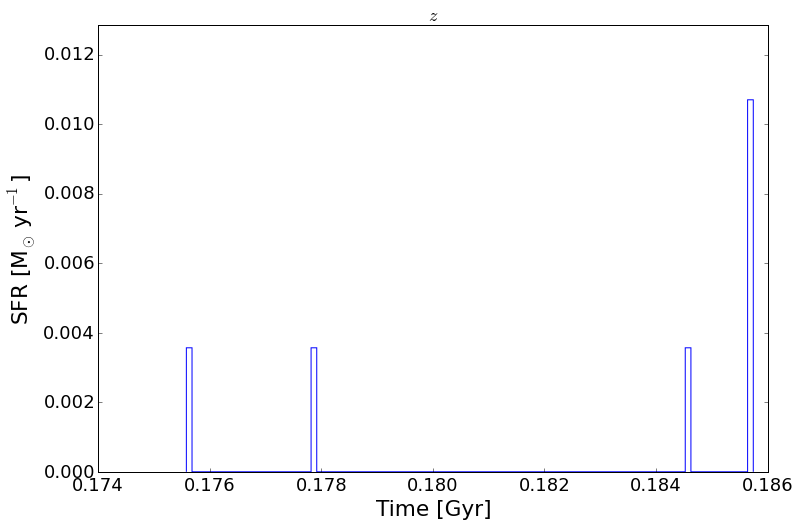

In [29]:
pynbody.plot.stars.sfh (s);

In [28]:
# Compute the ratio we plot above... Add 1e-10 to avoid divide by 0. So 0/0 -> 1.0
s.g['ratio'] = (1.0e0 - s.g['pgf'] + 1e-10)/(s.g['metal'] + 1e-10)
s.g['ratio2'] = (1.0e0 - s.g['pgf'] + 1e-10)/(12.45144*s.g['metal'] + 1e-10)

In [29]:
min(s.g['ratio']),max(s.g['ratio'])

(1.0, 18107.833310493897)

### Setup some filters to get at data in the non-expected range

In [30]:
1/(s.g['metal'][s.g['metal'] > 0.0][1]/(1.0-s.g['pgf'][s.g['pgf']< 1.0][1]))

0.49800248710979939

In [31]:
# The points below the line but not equal to 1 ... which means 1e-10/1e-10
arrayFilter = (s.g['ratio'] < 12.45) & (s.g['ratio'] > 1.0) & (s.g['ratio'] != 1.0) # Between 1 and 12.4
arrayFilter2 = ((s.g['ratio'] < 12.45) | (s.g['ratio'] > 12.46)) & (s.g['ratio'] != 1.0) # Off the line, will be 1 if Z & (1-PGF)=0
arrayFilter3 = ((s.g['ratio'] < 12.3) | (s.g['ratio'] > 12.7)) & (s.g['ratio'] != 1.0) # A bit further from the line
arrayGoodPts = ((s.g['ratio'] > 12.45) | (s.g['ratio'] < 12.453)) & (s.g['ratio'] != 1.0)

In [32]:
# ratio2 has Z adjusted by the slope: 12.45. So ratio2 will be 1 for points on the line...  
newarrayFilter2 = ((s.g['ratio2'] < 0.99 ) | (s.g['ratio2'] > 1.01)) & (s.g['ratio'] != 1.0) # Off the line
newarrayFilter3 = ((s.g['ratio2'] < 0.90) | (s.g['ratio2'] > 1.1)) & (s.g['ratio'] != 1.0) # A bit further from the line

In [33]:
# The points below the line 
len(s.g['ratio'][arrayFilter]),s.g['ratio'][arrayFilter][0:20]

(806, SimArray([ 12.44767418,  12.44949302,  12.44999003,  12.44031821,
         12.44850553,  12.44587256,  12.44285988,  12.44786711,
         12.44184513,  12.4479128 ,  12.44867632,  12.44294489,
         12.44625741,  12.44619681,  12.44887016,  12.44906805,
         12.44186122,  12.44941848,  12.44804683,  12.44077307]))

### These are really the bogus points... or, something is going on I don't understand.

In [34]:
# Off the line 
len(s.g['ratio'][arrayFilter2]),s.g['ratio'][arrayFilter2][0:20]

(1517,
 SimArray([ 2452.41425159,  1513.94117678,  3411.73037813,    12.44767418,
         4914.34671837,  1559.24724901,    12.44949302,    12.44999003,
           12.44031821,  3457.00323803,    12.44850553,    12.44587256,
           12.44285988,    12.44786711,  6773.88030881,  3808.69871966,
           12.44184513,    12.4479128 ,    12.44867632,  1676.61421516]))

In [35]:
len(s.g['ratio'][arrayFilter2])

1517

In [36]:
len(s.g['ratio'][s.g['ratio'] != 1.0])

12281

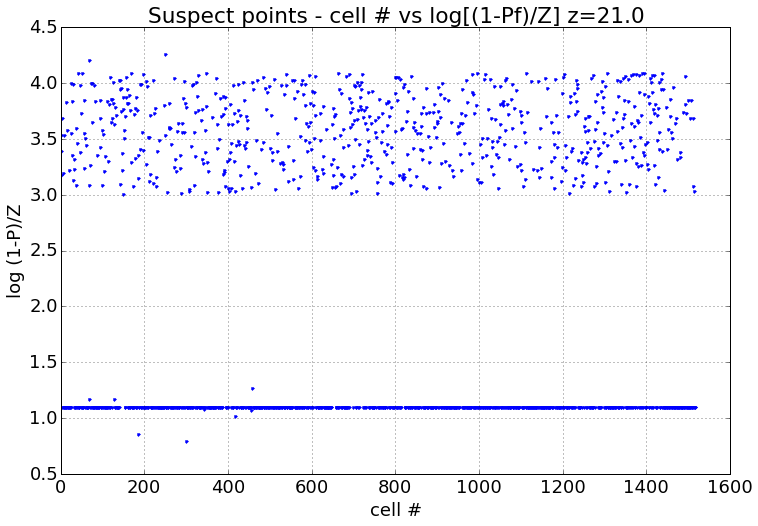

In [37]:
plt.plot(log10(s.g['ratio'][arrayFilter2]),'.')
plt.title("Suspect points - cell # vs log[(1-Pf)/Z] z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell #")
axes().set_ylabel("log (1-P)/Z")
#plt.ylim(-1, 10)
#plt.xlim(1e-7, 1)

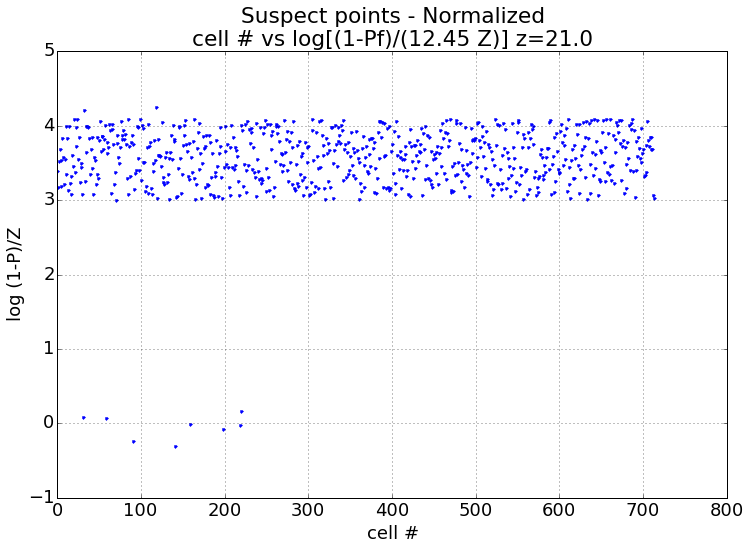

In [38]:
plt.plot(log10(s.g['ratio2'][newarrayFilter2]),'.')
plt.title("Suspect points - Normalized\ncell # vs log[(1-Pf)/(12.45 Z)] z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell #")
axes().set_ylabel("log (1-P)/Z")
#plt.ylim(-1, 10)
#plt.xlim(1e-7, 1)

(1e-07, 1)

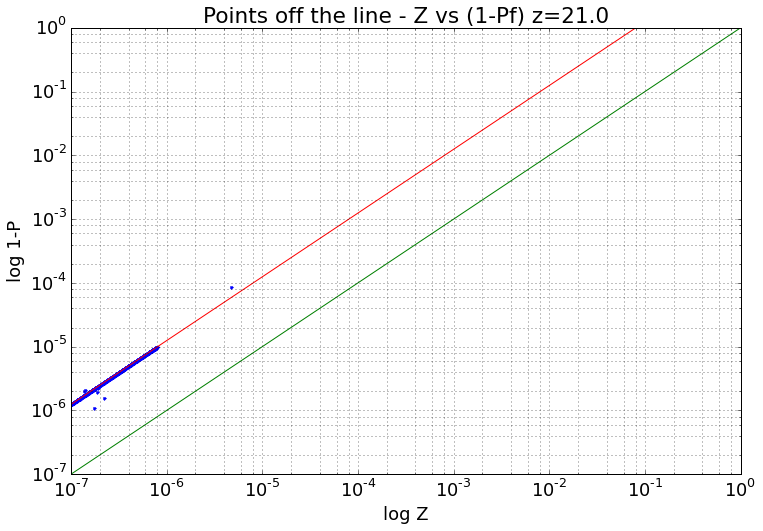

In [39]:
plt.loglog(s.g['metal'][arrayFilter2],1.0-s.g['pgf'][arrayFilter2],'.',linex,linex,linex,liney)
plt.title("Points off the line - Z vs (1-Pf) z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

(1e-07, 1)

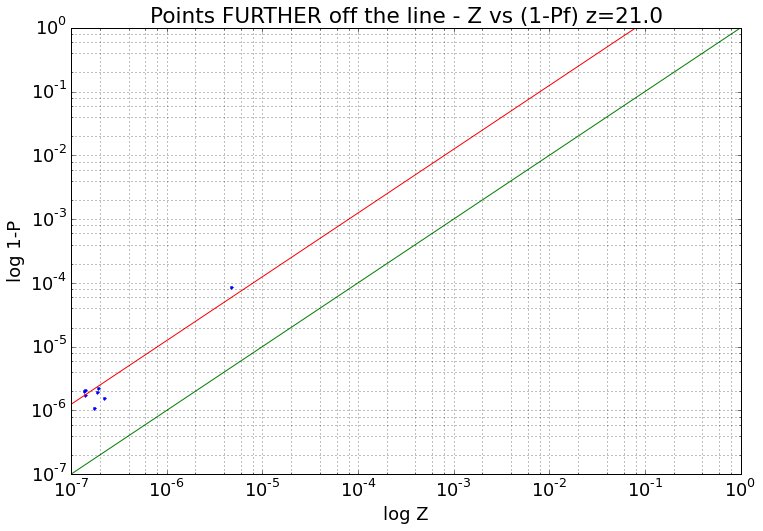

In [40]:
plt.loglog(s.g['metal'][arrayFilter3],1.0-s.g['pgf'][arrayFilter3],'.',linex,linex,linex,liney)
plt.title("Points FURTHER off the line - Z vs (1-Pf) z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

(0, 3.5e-05)

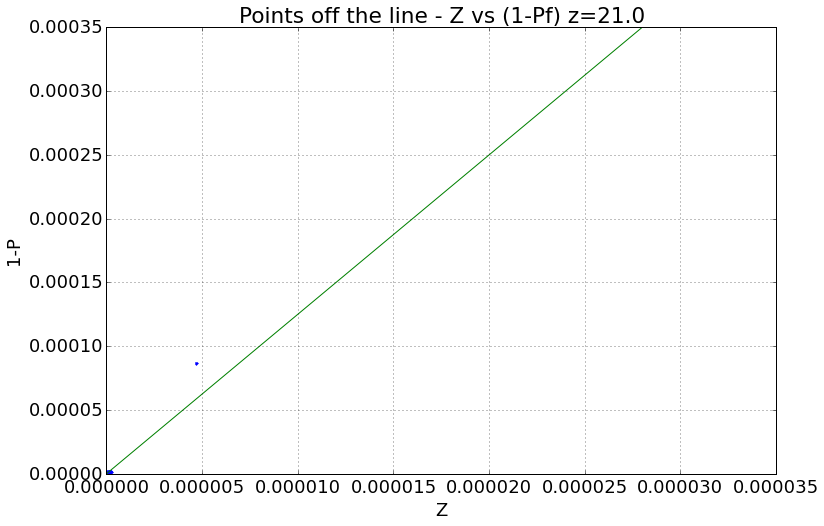

In [44]:
plt.plot(s.g['metal'][arrayFilter3],1.0-s.g['pgf'][arrayFilter3],'.',(0,1),(0,12.5))
plt.title("Points off the line - Z vs (1-Pf) z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("Z")
axes().set_ylabel("1-P")
plt.ylim(0, 0.00035)
plt.xlim(0, 0.000035)

In [45]:
badPoints = s.g['pos'][arrayFilter3]
goodPoints = s.g['pos'][arrayGoodPts]
# Pull out the x and y coords.
badXY = badPoints[...,[0,1]]
print len(badXY)
goodXY = goodPoints[...,[0,1]]
print len(goodXY)

714
12281


In [13]:
plt.loglog(s.g['rho'][arrayFilter3].in_units("g cm^-3"),s.g['metal'][arrayFilter3],'ro',
           s.g['rho'][arrayGoodPts].in_units("g cm^-3"),s.g['metal'][arrayGoodPts],'g.')
plt.title("rho - Z z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log rho")
axes().set_ylabel("log Z")
#plt.ylim(1e-7, 1)
#plt.xlim(1e-7, 1)

NameError: name 'arrayFilter3' is not defined

In [47]:
boxsizestring

'19.18 kpc'

(-9.3, 9.3)

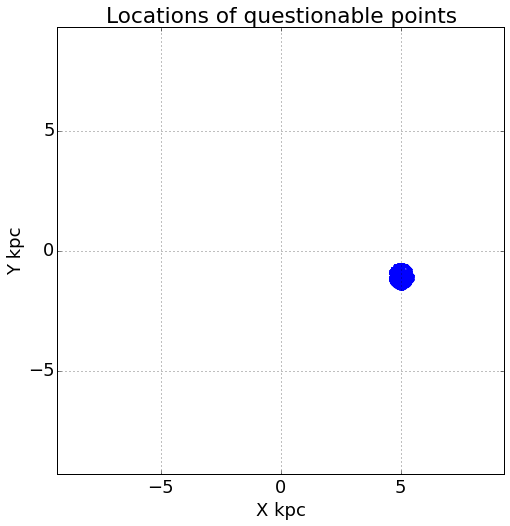

In [49]:
plt.plot(badXY[...,0],badXY[...,1],'.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.ylim(-9.3, 9.3)
plt.xlim(-9.3, 9.3)

(-1.6, -0.3)

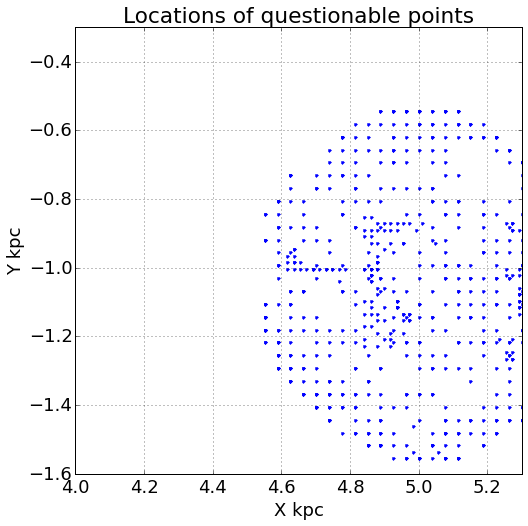

In [50]:
plt.plot(badXY[...,0],badXY[...,1],'.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.0, 5.3)
plt.ylim(-1.6, -0.3)

(-1.3, -0.75)

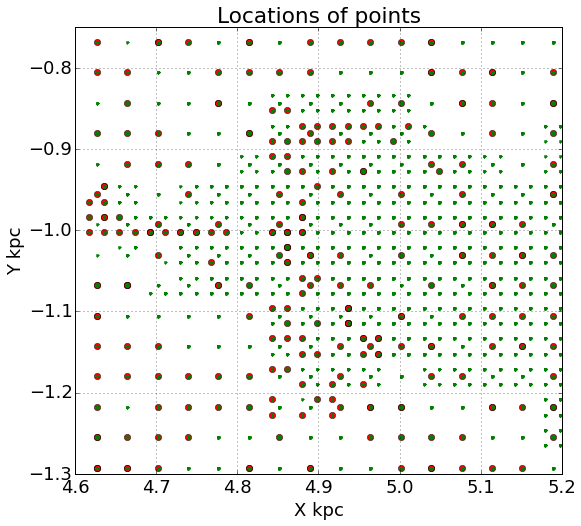

In [51]:
plt.plot(badXY[...,0],badXY[...,1],'ro',
         goodXY[...,0],goodXY[...,1],'g.')
plt.title("Locations of points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.6, 5.2)
plt.ylim(-1.3, -0.75)

(-1.6, -0.3)

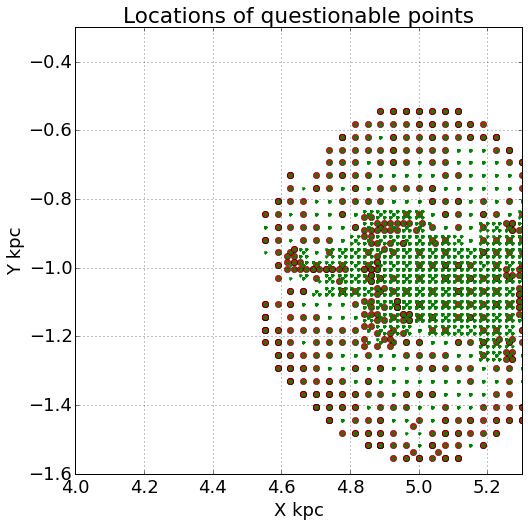

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(badXY[...,0],badXY[...,1],'ro')
ax1.plot(goodXY[...,0],goodXY[...,1],'g.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.0, 5.3)
plt.ylim(-1.6, -0.3)

In [14]:
    titleStr = "Z @ z = %.1lf" % z + "\nVol ave"
    sph.image(s.g,qty="metal",width="100 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


ValueError: Failed to make a sensible logarithmic image. This probably means there are no particles in the view.

In [53]:
# Cut out a cube of the "important data" ... around the area of interest above. 
impData = s[pynbody.filt.Cuboid("4.0 kpc", "-1.6 kpc","-5 kpc","5.3 kpc", "-.3 kpc", "0 kpc")]

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


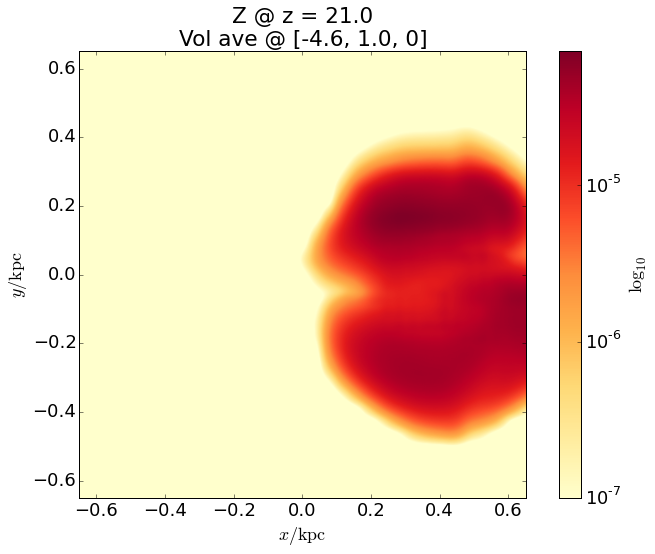

In [54]:
coords= [-4.6,1.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(impData,coords):
    titleStr = "Z @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="metal",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


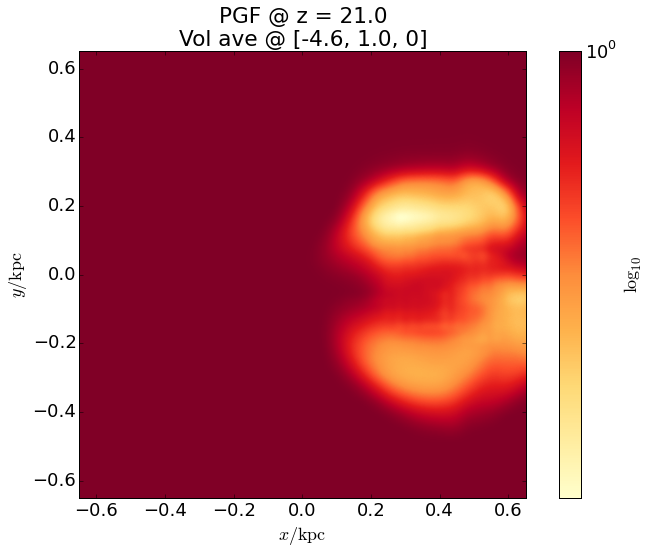

In [55]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="pgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [56]:
min(impData.g['pgf']),max(impData.g['pgf'][impData.g['pgf'] < 1.0])

(0.97434145492277946, 0.9999998979584096)

In [57]:
# 'invert' the pgf ... makes for better plotting.
impData.g['oneMpgf'] = 1.0 - impData.g['pgf']

In [58]:
max(impData.g['oneMpgf']),min(impData.g['oneMpgf'][impData.g['oneMpgf'] > 0.0])

(0.02565854507722054, 1.0204159039961525e-07)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


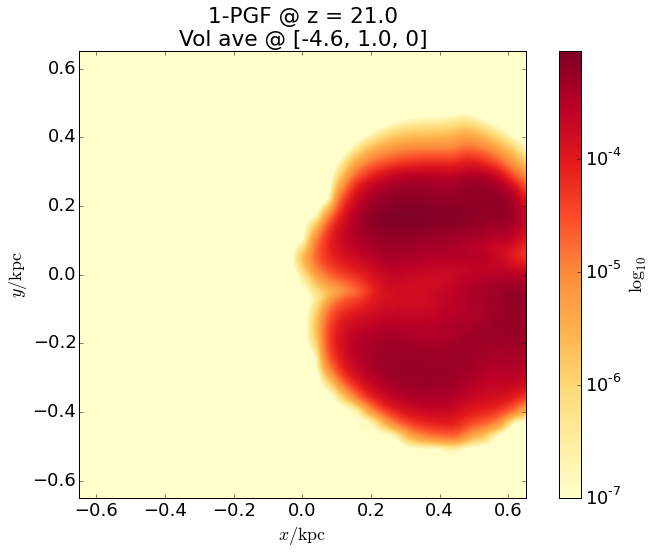

In [59]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [60]:
# Generate a set of points that should all be zero... 
test = impData.g['oneMpgf'] - (12.45144 * impData.g['metal'])
test

SimArray([ 0.,  0.,  0., ...,  0.,  0.,  0.])

(-0.0005, 0.0005)

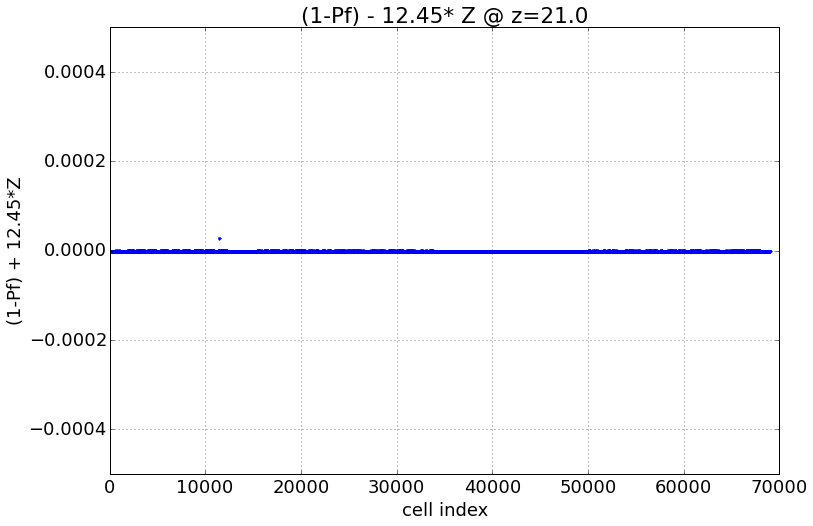

In [62]:
plt.plot(test,'.')
plt.title("(1-Pf) - 12.45* Z @ z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell index")
axes().set_ylabel("(1-Pf) + 12.45*Z")
plt.ylim(-.0005, .0005)
#plt.xlim(0, 0.00035)

/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


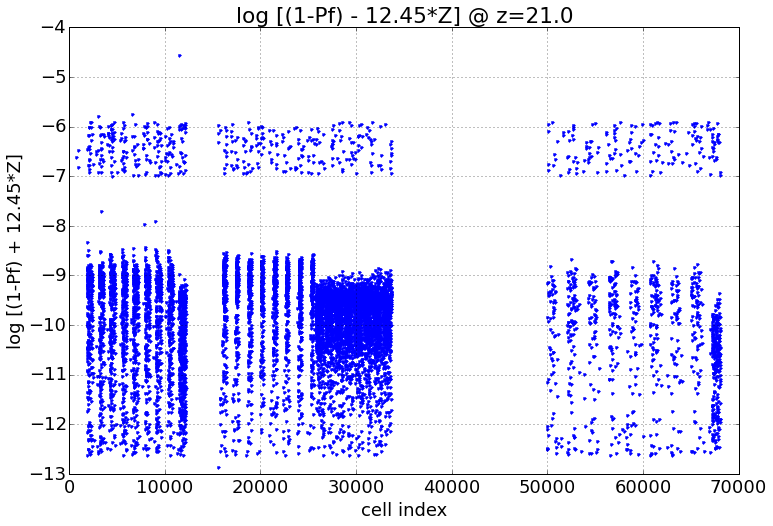

In [63]:
plt.plot(log10(test),'.')
plt.title("log [(1-Pf) - 12.45*Z] @ z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell index")
axes().set_ylabel("log [(1-Pf) + 12.45*Z]")
#plt.ylim(-.0005, .0005)
#plt.xlim(0, 0.00035)

In [64]:
test = impData.g['pgf'] + impData.g['oneMpgf']
test[test != 1.0]

SimArray([], dtype=float64)

In [65]:
# If everything is correct, should be equal lens
len(impData.g['pgf']), len(test[test == 1.0])

(68982, 68982)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


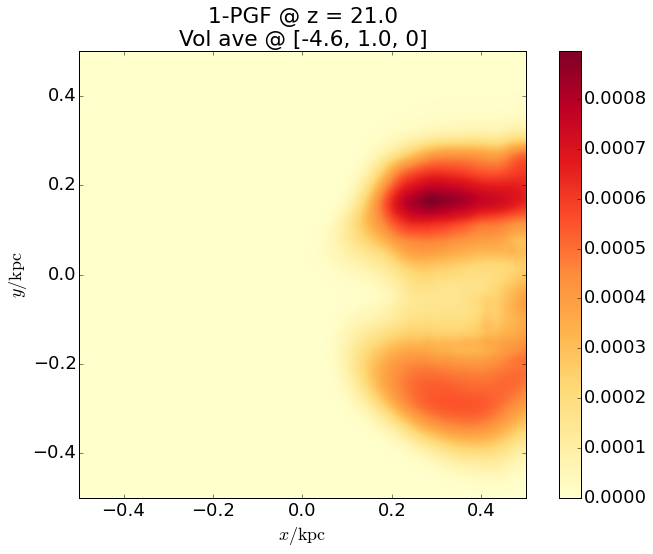

In [66]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=False, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [67]:
diff = impData.g['oneMpgf'] - 12.45144 * impData.g['metal']

In [68]:
len(diff[diff<0.0]),len(diff)

(12, 68982)

# Next

In [31]:
s2 = pynbody.load('output_00009')
s2['pos']
s2['pos'] -= 0.5
s2.physical_units();

IOError: File 'output_00009': format not understood or does not exist

In [ ]:
z2 = 1/s2.properties['a']-1
printboxsizestring2 = "%.2f" % s2.properties['boxsize'].in_units('kpc')
boxsizestring2 += " kpc"
print boxsizestring

In [ ]:
s2.g['metal'][s2.g['metal']<1e-7] = 0.0
s2.g['pzf'][s2.g['pzf']<1e-7] = 0.0
s2.s['ppf'][s2.s['ppf']>1.0] = 1.0

In [ ]:
plt.loglog(s2.g['metal'],1.0-s2.g['pgf']+1e-6,'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)